Info on interpolated data.

In [1]:
import pandas as pd
import numpy as np
from astropy import units as u
from ctapipe.coordinates import NominalFrame, AltAz
import matplotlib.pyplot as plt

In [2]:
#pkl_gamma = '/home/pietro/CTA/data_info/info_gamma.pkl'
#pkl_diffuse = '/home/pietro/CTA/data_info/info_diffuse.pkl'
#pkl_proton = '/home/pietro/CTA/data_info/info_proton.pkl'
#plike = pd.read_pickle(pkl_gamma)
#diffuse = pd.read_pickle(pkl_diffuse)
#protons = pd.read_pickle(pkl_proton)

#my_list = [plike, diffuse, protons]


In [3]:
pkl_gamma = "/mnt/Dati/CTA/results/plike_gamma.pkl"
pkl_diffuse = "/mnt/Dati/CTA/results/diff_gamma.pkl"
pkl_proton = "/mnt/Dati/CTA/results/proton.pkl"

plike = pd.read_pickle(pkl_gamma)
diffuse = pd.read_pickle(pkl_diffuse)
protons = pd.read_pickle(pkl_proton)

plike["energy_true"] = np.power(10, plike["energy_true"])
diffuse["energy_true"] = np.power(10, diffuse["energy_true"])
protons["energy_true"] = np.power(10, protons["energy_true"])

my_list = [plike, diffuse, protons]



##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################

GAMMA POINTLIKE

In [4]:
plike

,file_idx,img_idx,event_idx,intensity,leakage2,class,energy_true,az,alt,d_alt,d_az
0,10.0,0.0,0.0,172.082581,0.000000,1.0,0.022787,70.0,180.000005,-3.288022e-07,0.000002
1,10.0,1.0,1.0,567.250549,0.165889,1.0,0.201731,70.0,180.000005,-3.288022e-07,0.000002
2,10.0,2.0,1.0,2354.177246,0.000000,1.0,0.201731,70.0,180.000005,-3.288022e-07,0.000002
3,10.0,3.0,1.0,1413.055054,0.000000,1.0,0.201731,70.0,180.000005,-3.288022e-07,0.000002
4,10.0,4.0,1.0,496.169800,0.000000,1.0,0.201731,70.0,180.000005,-3.288022e-07,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
1931099,4.0,97034.0,54398.0,204.897461,0.000000,1.0,0.023192,70.0,180.000005,-3.288022e-07,0.000002
1931100,4.0,97035.0,54400.0,40.722317,0.000000,1.0,0.008058,70.0,180.000005,-3.288022e-07,0.000002
1931101,4.0,97036.0,54401.0,171.398178,0.000000,1.0,0.009030,70.0,180.000005,-3.288022e-07,0.000002
1931102,4.0,97037.0,54402.0,201.304153,0.000000,1.0,0.009161,70.0,180.000005,-3.288022e-07,0.000002


In [5]:
np.mean(plike['class'], axis=0)

1.0

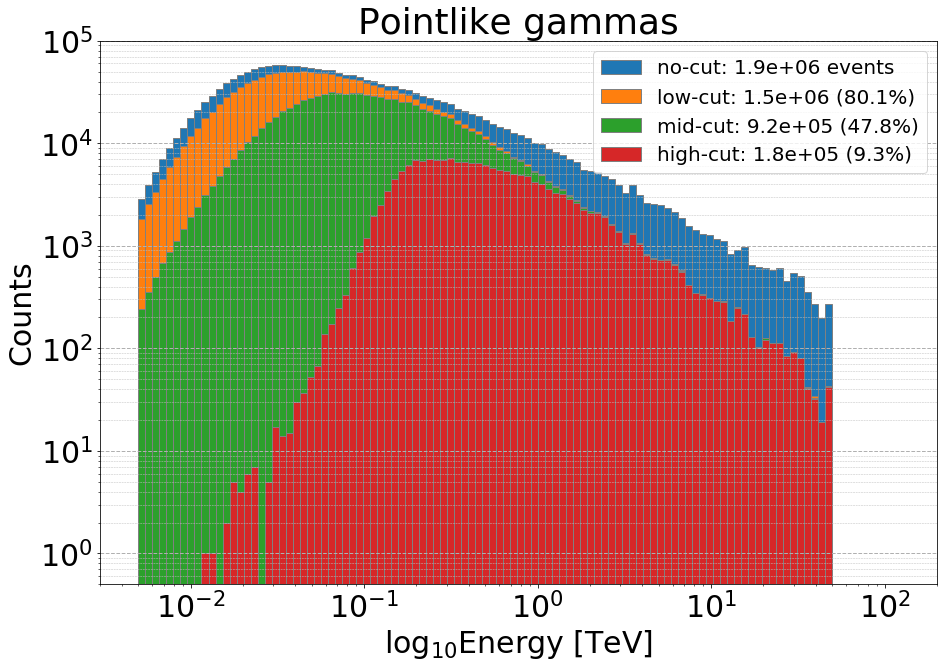

In [6]:
# intensity threshold
thr = 200
gammaness = 0.8

# plot stuff
emin = np.log10(min(plike['energy_true']))
emax = np.log10(max(plike['energy_true']))
fig = plt.figure(figsize=(15,10))

plike_lowcut = plike['energy_true'][(plike['intensity']>50)&(plike['leakage2']<0.2)]
plike_midcut = plike['energy_true'][(plike['intensity']>200)&(plike['leakage2']<0.2)]
plike_highcut = plike['energy_true'][(plike['intensity']>1000)&(plike['leakage2']<0.2)]

# areas under curves aka # of events
area_nocut = len( plike )
area_highcut = len(plike_highcut)
highcut_percent = area_highcut/area_nocut*100
area_midcut = len( plike_midcut )
midcut_percent = area_midcut/area_nocut*100
area_lowcut = len( plike_lowcut )
lowcut_percent = area_lowcut/area_nocut*100


a=plt.hist(plike['energy_true'], bins=np.logspace(emin, emax, 100), edgecolor='gray', label='no-cut: {:.1e} events'.format(area_nocut))
b=plt.hist(plike_lowcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='low-cut: {:.1e} ({:.1f}%)'.format(area_lowcut, lowcut_percent))
c=plt.hist(plike_midcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='mid-cut: {:.1e} ({:.1f}%)'.format(area_midcut, midcut_percent))
d=plt.hist(plike_highcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='high-cut: {:.1e} ({:.1f}%)'.format(area_highcut,highcut_percent), alpha=1)

plt.legend(fontsize=20)
plt.xlim(0.003,2e2)
plt.ylim(0.5,1e5)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=30)
plt.title("Pointlike gammas", fontsize=36)
xlabel=plt.xlabel('$\log_{10}$Energy [TeV]', fontsize=30)
ylabel=plt.ylabel('Counts', fontsize=30)
grid = plt.grid(which='major', b=True, linestyle="--",lw=1., axis='y')
grid = plt.grid(which='minor', b=True, linestyle="--", lw=0.5, axis='y', color='silver')
#grid = plt.grid(which='minor', b=True, linestyle="--", alpha=0.4)
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/spectrum_plike.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/spectrum_plike.png", bbox_inches='tight')

In [7]:
def energy_thr(ene):
    a_bins = (plt.hist(np.log10(ene), weights=np.power(ene, -1.6), bins=100))
    threshold = np.power(10,a_bins[1][np.argmax(a_bins[0])])*1000
    print("Energy threshold {:.2f} GeV ".format(threshold))
    return threshold

Energy threshold 13.77 GeV 
Energy threshold 13.76 GeV 
Energy threshold 23.95 GeV 
Energy threshold 155.48 GeV 


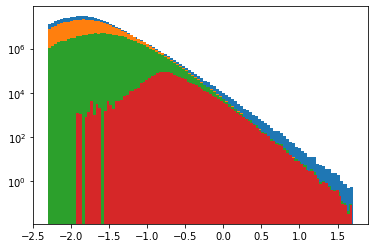

In [8]:
thr_nc = energy_thr(plike['energy_true'])
thr_lc = energy_thr(plike_lowcut)
thr_lc = energy_thr(plike_midcut)
thr_hc = energy_thr(plike_highcut)
plt.yscale('log')

from matplotlib.colors import LogNorm
thr = 200
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
nbins=100
a=axes[0].hist2d(plike['alt'], plike['az'], bins=nbins, norm=LogNorm())#, edgecolor='gray')
b=axes[1].hist2d(plike['delta_alt'],plike['delta_az'], bins=nbins, norm=LogNorm())
#plt.yscale('log')
#plt.xscale('log')
title0 = axes[0].set_title('AltAz', fontsize=20)
title1 = axes[1].set_title('Nominal Frame', fontsize=20)
xlabel0=axes[0].set_xlabel('Alt [deg]', fontsize=14)
ylabel0=axes[0].set_ylabel('Az [deg]', fontsize=14)
xlabel1=axes[1].set_xlabel('Delta_Alt [deg]', fontsize=14)
ylabel1=axes[1].set_ylabel('Delta_Az [deg]', fontsize=14)
#ylabel=plt.ylabel('Counts', fontsize=14)
#grid = plt.grid(which='major', b=True, linestyle="--")
#grid = plt.grid(which='minor', b=True, linestyle="--")

area_b = len( plike[plike['intensity'] > thr] )
area_a = len( plike )

print('# events (total): {:.1e}'.format(area_a))
print('# events (size > {}): {:.1e} ({:.1f}%)'.format(thr, area_b, area_b/area_a*100))

##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################


GAMMA DIFFUSE:

In [9]:
diffuse

,file_idx,img_idx,event_idx,intensity,leakage2,class,energy_true,az,alt,d_alt,d_az
0,25.0,0.0,0.0,291.950836,0.378099,1.0,0.776284,66.040081,179.609086,-3.959409,-0.159128
1,25.0,1.0,1.0,152.409149,0.000000,1.0,0.776284,66.040081,179.609086,-3.959409,-0.159128
2,25.0,2.0,2.0,175.987183,0.000000,1.0,0.019142,68.198052,181.162968,-1.797827,0.432113
3,25.0,3.0,2.0,127.446312,0.000000,1.0,0.019142,68.198052,181.162968,-1.797827,0.432113
4,25.0,4.0,3.0,339.030701,0.000000,1.0,0.019142,68.198052,181.162968,-1.797827,0.432113
...,...,...,...,...,...,...,...,...,...,...,...
2002907,49.0,19585.0,11884.0,567.474243,0.000000,1.0,0.057830,70.358229,186.561877,0.476791,2.201497
2002908,49.0,19586.0,11885.0,65.188828,1.000000,1.0,0.021893,71.641554,172.621297,1.782043,-2.319338
2002909,49.0,19587.0,11887.0,129.969543,1.000000,1.0,0.232923,69.554364,186.665696,-0.318501,2.323875
2002910,49.0,19588.0,11887.0,1591.258667,0.065988,1.0,0.232923,69.554364,186.665696,-0.318501,2.323875


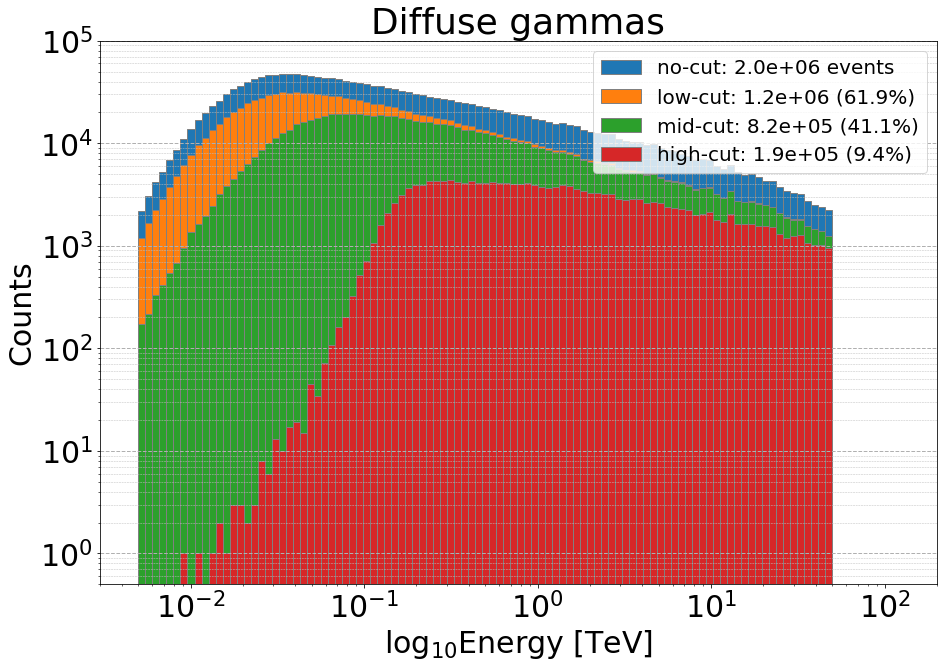

In [10]:
# intensity threshold
thr = 200
gammaness = 0.8

# plot stuff
emin = np.log10(min(diffuse['energy_true']))
emax = np.log10(max(diffuse['energy_true']))
fig = plt.figure(figsize=(15,10))

save_diffuse = diffuse
#diffuse = diffuse[:len(protons)]
diffuse_lowcut = diffuse['energy_true'][(diffuse['intensity']>50)&(diffuse['leakage2']<0.2)]
diffuse_midcut = diffuse['energy_true'][(diffuse['intensity']>200)&(diffuse['leakage2']<0.2)]
diffuse_highcut = diffuse['energy_true'][(diffuse['intensity']>1000)&(diffuse['leakage2']<0.2)]

# areas under curves aka # of events
area_nocut = len( diffuse )
area_highcut = len(diffuse_highcut)
highcut_percent = area_highcut/area_nocut*100
area_midcut = len( diffuse_midcut )
midcut_percent = area_midcut/area_nocut*100
area_lowcut = len( diffuse_lowcut )
lowcut_percent = area_lowcut/area_nocut*100


a=plt.hist(diffuse['energy_true'], bins=np.logspace(emin, emax, 100), edgecolor='gray', label='no-cut: {:.1e} events'.format(area_nocut))
b=plt.hist(diffuse_lowcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='low-cut: {:.1e} ({:.1f}%)'.format(area_lowcut, lowcut_percent))
c=plt.hist(diffuse_midcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='mid-cut: {:.1e} ({:.1f}%)'.format(area_midcut, midcut_percent))
d=plt.hist(diffuse_highcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='high-cut: {:.1e} ({:.1f}%)'.format(area_highcut,highcut_percent), alpha=1)

plt.legend(fontsize=20)
plt.xlim(0.003,2e2)
plt.ylim(0.5,1e5)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=30)
plt.title("Diffuse gammas", fontsize=36)
xlabel=plt.xlabel('$\log_{10}$Energy [TeV]', fontsize=30)
ylabel=plt.ylabel('Counts', fontsize=30)
grid = plt.grid(which='major', b=True, linestyle="--",lw=1., axis='y')
grid = plt.grid(which='minor', b=True, linestyle="--", lw=0.5, axis='y', color='silver')
#grid = plt.grid(which='major', b=True, linestyle="--")
#grid = plt.grid(which='minor', b=True, linestyle="--", alpha=0.4)
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/spectrum_diffuse.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/spectrum_diffuse.png", bbox_inches='tight')

Energy threshold 12.56 GeV 
Energy threshold 13.77 GeV 
Energy threshold 26.26 GeV 
Energy threshold 168.65 GeV 


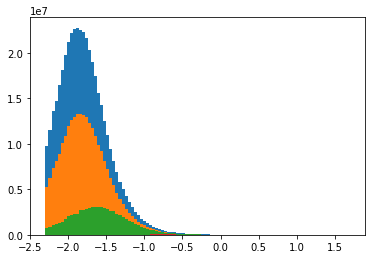

In [11]:
thr_nc = energy_thr(diffuse['energy_true'])
thr_lc = energy_thr(diffuse_lowcut)
thr_lc = energy_thr(diffuse_midcut)
thr_hc = energy_thr(diffuse_highcut)

# events (total): 2.0e+06
# events (size > 200): 1.2e+06 (61.1%)


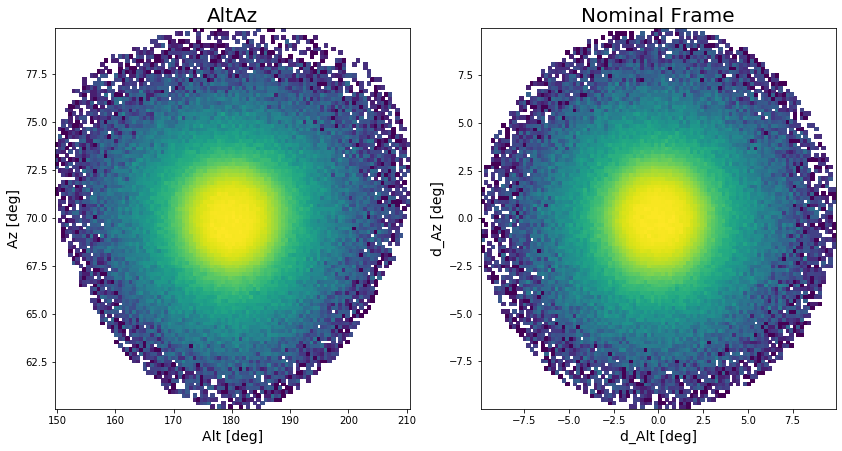

In [12]:
from matplotlib.colors import LogNorm

thr = 200
fig, axes = plt.subplots(ncols=2, figsize=(14,7))
nbins=100
a=axes[0].hist2d(diffuse['alt'], diffuse['az'], bins=nbins, norm=LogNorm())#, edgecolor='gray')
b=axes[1].hist2d(diffuse['d_alt'],diffuse['d_az'], bins=nbins, norm=LogNorm())
#plt.yscale('log')
#plt.xscale('log')
title0 = axes[0].set_title('AltAz', fontsize=20)
title1 = axes[1].set_title('Nominal Frame', fontsize=20)
xlabel0=axes[0].set_xlabel('Alt [deg]', fontsize=14)
ylabel0=axes[0].set_ylabel('Az [deg]', fontsize=14)
xlabel1=axes[1].set_xlabel('d_Alt [deg]', fontsize=14)
ylabel1=axes[1].set_ylabel('d_Az [deg]', fontsize=14)
#ylabel=plt.ylabel('Counts', fontsize=14)
#grid = plt.grid(which='major', b=True, linestyle="--")
#grid = plt.grid(which='minor', b=True, linestyle="--")

area_b = len( diffuse[diffuse['intensity'] > thr] )
area_a = len( diffuse )

print('# events (total): {:.1e}'.format(area_a))
print('# events (size > {}): {:.1e} ({:.1f}%)'.format(thr, area_b, area_b/area_a*100))

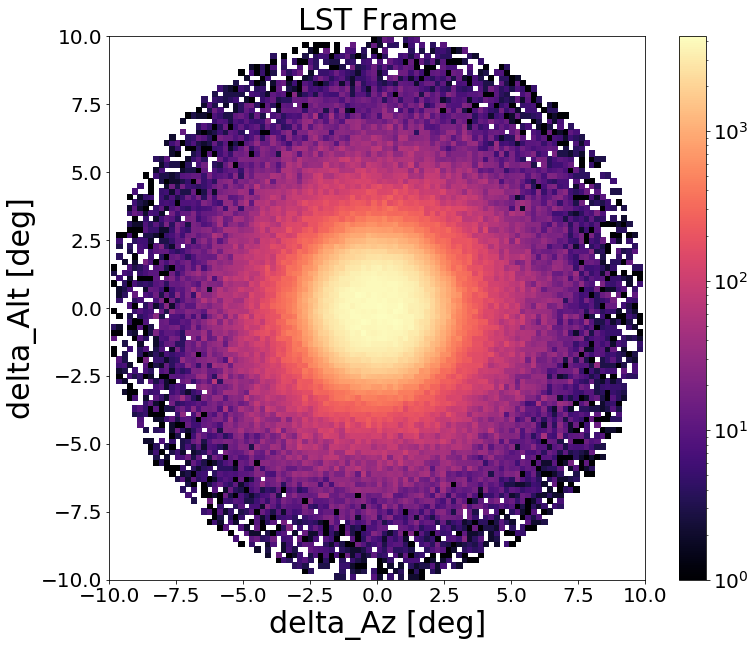

In [13]:
from matplotlib.colors import LogNorm
import matplotlib
cmap = matplotlib.cm.get_cmap("magma", 256)
fsize = 20
matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
thr = 200
fig, axes = plt.subplots(ncols=1, figsize=(12,10))
nbins=100
b=axes.hist2d(diffuse['d_alt'],diffuse['d_az'], bins=nbins, norm=LogNorm(), cmap=cmap)
plt.colorbar(b[3])
#plt.yscale('log')
#plt.xscale('log')
#grid = plt.grid(which='major', b=True, linestyle="--")
axes.set_xlim([-10,10])
axes.set_ylim([-10,10])
title1 = axes.set_title('LST Frame', fontsize=30)
#xlabel1=axes.set_xlabel(r'$\Delta \hat{\rho}$ [deg]', fontsize=30)
xlabel1=axes.set_xlabel('delta_Az [deg]', fontsize=30)
#ylabel1=axes.set_ylabel(r'$\Delta \hat{\alpha}$ [deg]', fontsize=30)
ylabel1=axes.set_ylabel('delta_Alt [deg]', fontsize=30)
#ylabel=plt.ylabel('Counts', fontsize=14)
#grid = plt.grid(which='major', b=True, linestyle="--")
#grid = plt.grid(which='minor', b=True, linestyle="--")
#plt.tick_params(labelsize=16)

plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/nominalframe_diffuse.pdf", bbox_inches="tight")
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/nominalframe_diffuse.png", bbox_inches="tight")

In [29]:
theta = (diffuse['d_alt']**2 + diffuse['d_az']**2)

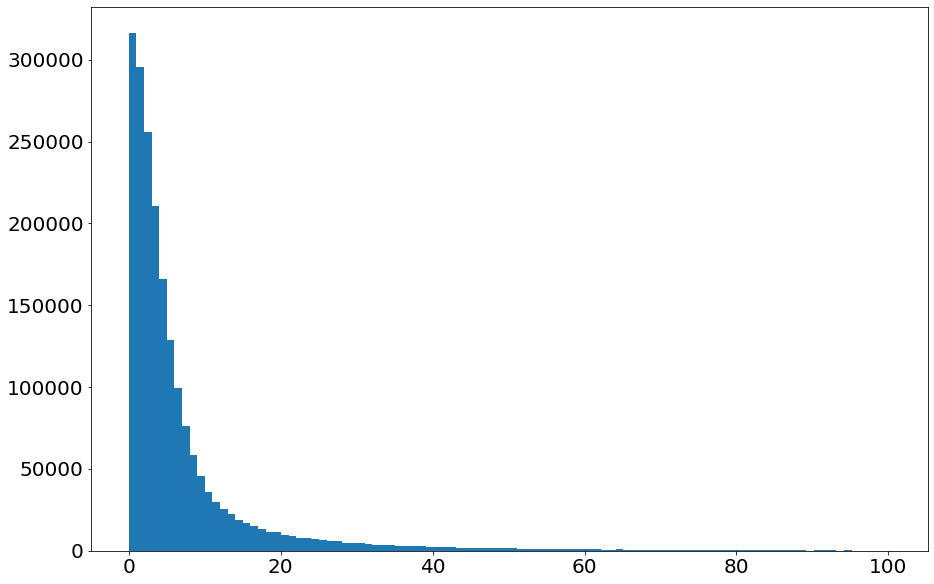

In [31]:
fig = plt.figure(figsize=(15,10))
lol = plt.hist(theta, bins=100)
#plt.yscale('log')

In [14]:

alt_LST = 70  # deg
az_LST = 180  # deg
point = AltAz(
    alt=alt_LST * u.deg,
    az=az_LST * u.deg
)

alt = diffuse['az'][:100]
az = diffuse['alt'][:100]
src = AltAz(
            alt=alt * u.deg,
            az=az * u.deg
        )


In [15]:
source_direction = src.transform_to(NominalFrame(origin=point))

In [16]:
import astropy

In [17]:
dir(source_direction)

['T',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply',
 '_attr_names_with_defaults',
 '_data',
 '_data_repr',
 '_default_differential',
 '_default_representation',
 '_frame_attrs_repr',
 '_frame_class_cache',
 '_frame_specific_representation_info',
 '_frameattr_equiv',
 '_get_representation_info',
 '_inherit_descriptors_',
 '_location',
 '_obstime',
 '_origin',
 '_replicate',
 '_representation',
 'cache',
 'cartesian',
 'copy',
 'data',
 'default_differential',
 'default_represent

In [18]:
help(source_direction.delta_az)

Help on Longitude in module astropy.coordinates.angles object:

class Longitude(Angle)
 |  Longitude-like angle(s) which are wrapped within a contiguous 360 degree range.
 |  
 |  A ``Longitude`` object is distinguished from a pure
 |  :class:`~astropy.coordinates.Angle` by virtue of a ``wrap_angle``
 |  property.  The ``wrap_angle`` specifies that all angle values
 |  represented by the object will be in the range::
 |  
 |    wrap_angle - 360 * u.deg <= angle(s) < wrap_angle
 |  
 |  The default ``wrap_angle`` is 360 deg.  Setting ``wrap_angle=180 *
 |  u.deg`` would instead result in values between -180 and +180 deg.
 |  Setting the ``wrap_angle`` attribute of an existing ``Longitude``
 |  object will result in re-wrapping the angle values in-place.
 |  
 |  The input angle(s) can be specified either as an array, list,
 |  scalar, tuple, string, :class:`~astropy.units.Quantity`
 |  or another :class:`~astropy.coordinates.Angle`.
 |  
 |  The input parser is flexible and supports all

##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################

PROTONS:

In [19]:
protons

,file_idx,img_idx,event_idx,intensity,leakage2,class,energy_true,az,alt,d_alt,d_az
0,0.0,0.0,0.0,37.208530,0.000000,0.0,0.129611,68.835890,176.430412,-1.126390,-1.288290
1,0.0,1.0,1.0,109.369591,0.000000,0.0,0.030669,70.813564,163.407249,1.550539,-5.387092
2,0.0,2.0,2.0,133.821381,0.000000,0.0,0.247406,68.649166,181.312139,-1.345693,0.477816
3,0.0,3.0,3.0,141.905411,0.303353,0.0,0.139561,69.922498,185.840650,0.018447,2.001979
4,0.0,4.0,3.0,98.975487,0.052445,0.0,0.139561,69.922498,185.840650,0.018447,2.001979
...,...,...,...,...,...,...,...,...,...,...,...
1160315,499.0,2361.0,1642.0,282.491913,0.851152,0.0,2.243479,67.547497,173.211644,-2.308225,-2.589512
1160316,499.0,2362.0,1642.0,1240.287231,0.294009,0.0,2.243479,67.547497,173.211644,-2.308225,-2.589512
1160317,499.0,2363.0,1643.0,9.581665,0.000000,0.0,1.334174,70.847319,173.658448,0.955418,-2.077077
1160318,499.0,2364.0,1645.0,376.689575,0.000000,0.0,38.710960,60.004072,172.229067,-9.745024,-3.932880


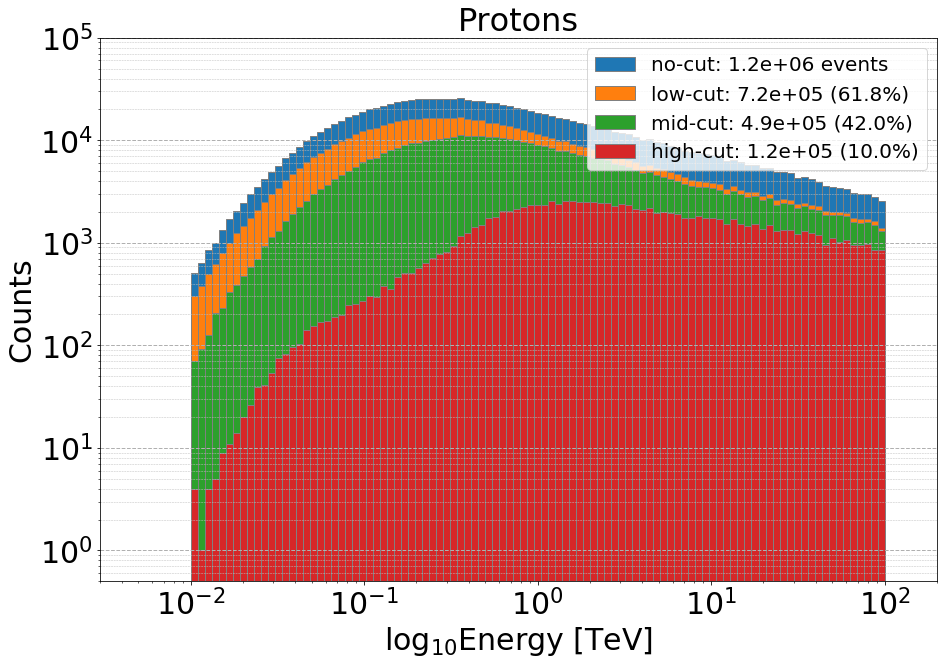

In [20]:
# intensity threshold
thr = 200
gammaness = 0.8

# plot stuff
emin = np.log10(min(protons['energy_true']))
emax = np.log10(max(protons['energy_true']))
fig = plt.figure(figsize=(15, 10))

protons_lowcut = protons['energy_true'][(protons['intensity']>50)&(protons['leakage2']<0.2)]
protons_midcut = protons['energy_true'][(protons['intensity']>200)&(protons['leakage2']<0.2)]
protons_highcut = protons['energy_true'][(protons['intensity']>1000)&(protons['leakage2']<0.2)]

# areas under curves aka # of events
area_nocut = len( protons )
area_highcut = len(protons_highcut)
highcut_percent = area_highcut/area_nocut*100
area_midcut = len( protons_midcut )
midcut_percent = area_midcut/area_nocut*100
area_lowcut = len( protons_lowcut )
lowcut_percent = area_lowcut/area_nocut*100


a=plt.hist(protons['energy_true'], bins=np.logspace(emin, emax, 100), edgecolor='gray', label='no-cut: {:.1e} events'.format(area_nocut))
b=plt.hist(protons_lowcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='low-cut: {:.1e} ({:.1f}%)'.format(area_lowcut, lowcut_percent))
c=plt.hist(protons_midcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='mid-cut: {:.1e} ({:.1f}%)'.format(area_midcut, midcut_percent))
d=plt.hist(protons_highcut, bins=np.logspace(emin, emax, 100), edgecolor='gray', label='high-cut: {:.1e} ({:.1f}%)'.format(area_highcut,highcut_percent), alpha=1)

plt.legend(fontsize=20)
plt.xlim(0.003,2e2)
plt.ylim(0.5,1e5)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=30)
plt.title("Protons", fontsize=32)
xlabel=plt.xlabel('$\log_{10}$Energy [TeV]', fontsize=30)
ylabel=plt.ylabel('Counts', fontsize=30)
grid = plt.grid(which='major', b=True, linestyle="--",lw=1., axis='y')
grid = plt.grid(which='minor', b=True, linestyle="--", lw=0.5, axis='y', color='silver')
#grid = plt.grid(which='major', b=True, linestyle="--")
#grid = plt.grid(which='minor', b=True, linestyle="--", alpha=0.4)
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/spectrum_protons.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/spectrum_protons.png", bbox_inches='tight')

-2.3010017744039732 1.6989462134440652 -323.0737609863281 5.4743296959429895


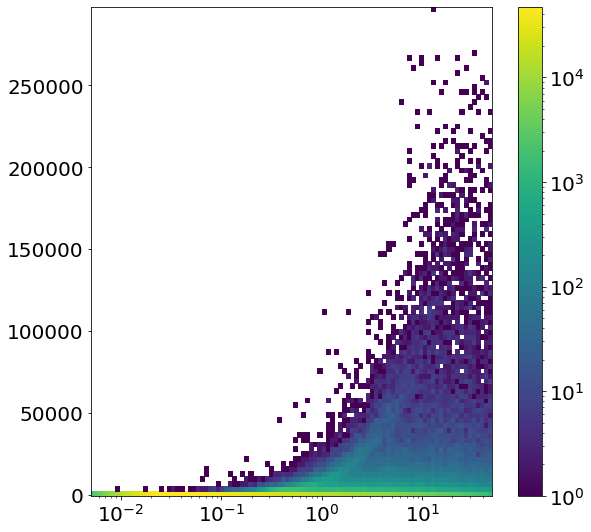

In [21]:
from matplotlib.colors import LogNorm
#df = plike[(plike['intensity']>50) & (plike['intensity']<2000)]
df = diffuse
thr = 200
fig, axes = plt.subplots(ncols=1, figsize=(9,9))
emin = np.log10(min(df['energy_true']))
emax = np.log10(max(df['energy_true']))
imin = (min(df['intensity']))
imax = np.log10(max(df['intensity']))
print(emin,emax,imin,imax)
nbins=100
plt.xscale('log')
a=axes.hist2d(df['energy_true'], df['intensity'], bins=(np.logspace(emin, emax, 100),100), norm=LogNorm())#, edgecolor='gray')
plt.colorbar(a[3])

In [22]:
help(axes.hist2d)

Help on method hist2d in module matplotlib.axes._axes:

hist2d(x, y, bins=10, range=None, density=False, weights=None, cmin=None, cmax=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a 2D histogram plot.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input values
    
    bins : None or int or [int, int] or array_like or [array, array]
    
        The bin specification:
    
            - If int, the number of bins for the two dimensions
              (nx=ny=bins).
    
            - If ``[int, int]``, the number of bins in each dimension
              (nx, ny = bins).
    
            - If array_like, the bin edges for the two dimensions
              (x_edges=y_edges=bins).
    
            - If ``[array, array]``, the bin edges in each dimension
              (x_edges, y_edges = bins).
    
        The default value is 10.
    
    range : array_like shape(2, 2), optional, default: None
         The left